# Goal
Conduct a power analysis using evident tool https://github.com/biocore/evident

# Init

In [6]:
import evident
import pandas as pd
import os
from evident.plotting import plot_power_curve
import numpy as np
import matplotlib.pyplot as plt

# Load

In [7]:
pwd

'/Users/abogdanova/Desktop/abogdanova/psoriasis/remote/Gut-microbiota-in-Psoriasis/power_analysis'

In [8]:
os.chdir('/Users/abogdanova/Desktop/abogdanova/psoriasis/remote/Gut-microbiota-in-Psoriasis/power_analysis')


In [9]:
tax_PS_PCs = pd.read_table("./PCs_status.txt", sep="\t", index_col=0)

In [10]:
tax_PS_PCs

,Diagnosis,Calprotectin,Axis.1,Axis.2,Axis.3,Axis.4
ID,,,,,,
D9_profile,control,13.25,0.170586,-0.001363,0.055771,-0.118038
D99_profile,control,17.75,-0.163006,-0.212193,0.197104,0.064833
D98_profile,control,6.25,-0.032640,0.109936,0.161171,0.142858
D97_profile,control,7.10,0.331754,0.214145,0.081216,0.042891
D96_profile,control,6.80,0.054307,-0.302470,0.022878,-0.143294
...,...,...,...,...,...,...
D13_profile,control,0.65,-0.601324,0.176320,-0.106436,-0.096258
D12_profile,control,6.30,-0.470136,0.088532,-0.091561,-0.012480
D11_profile,control,0.00,-0.459454,0.086624,-0.108376,-0.062041


# Analysis

In [12]:
tax_PS_PCs.groupby("Diagnosis").agg({'Axis.1' : ["count", "mean", "std"] })

Axis.1                    
           count      mean       std
Diagnosis                           
control       47  0.019736  0.289526
psoriasis     53 -0.017501  0.283266

In [13]:
pc1 = tax_PS_PCs["Axis.1"]

In [14]:
tax_ps_p1 = evident.UnivariateDataHandler(pc1, tax_PS_PCs)

In [15]:
# Now calculate the effect size of this difference
tax_ps_p1.calculate_effect_size(column="Diagnosis")

#EffectSizeResult(effect_size=np.float64(0.13009884515962897), metric='cohens_d', column='Diagnosis')


EffectSizeResult(effect_size=np.float64(0.130098845159629), metric='cohens_d', column='Diagnosis')

<Axes: xlabel='Total Observations', ylabel='Power (1 - $\\beta$)'>

<Figure size 350x350 with 0 Axes>

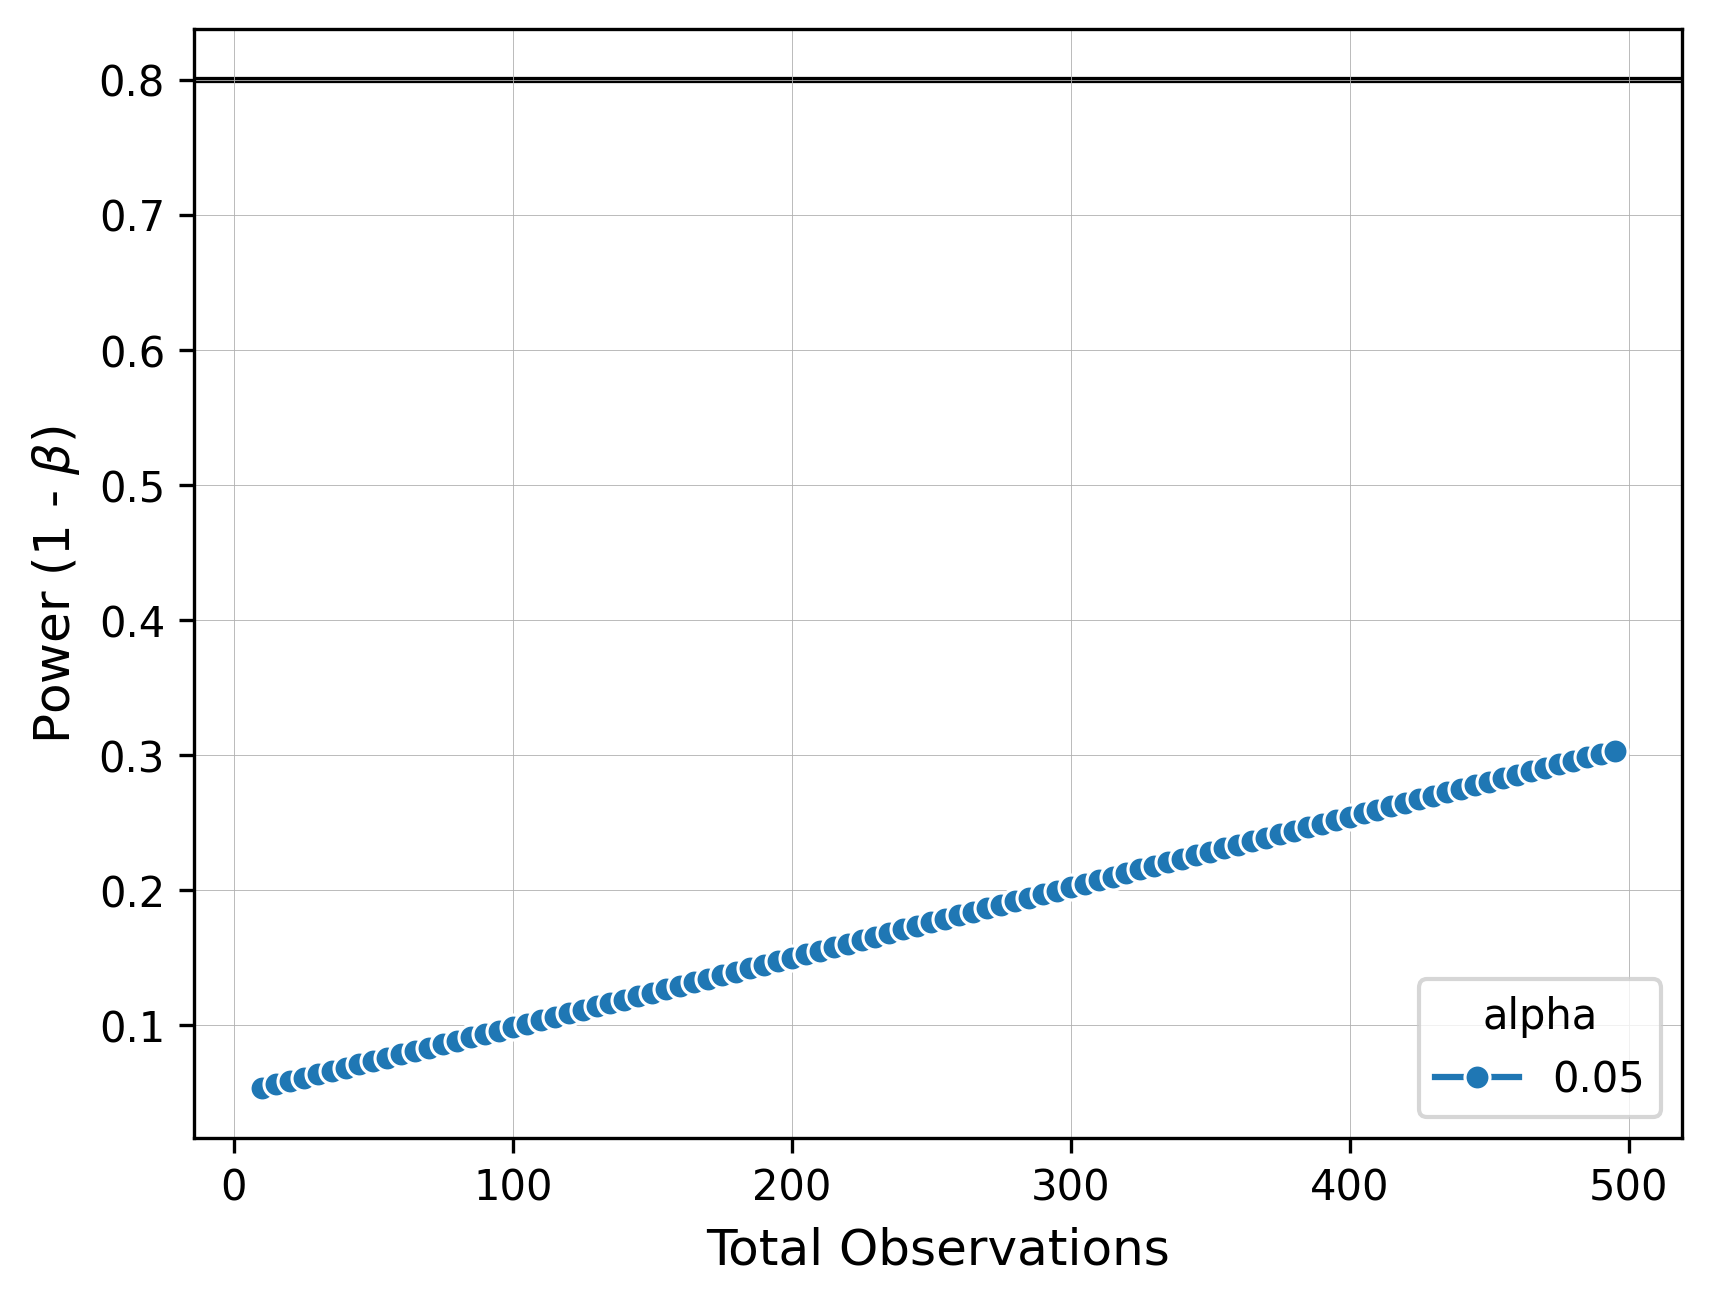

In [17]:
# Set the size of the figure
plt.figure(figsize=(3.5, 3.5))

# Results of the analysis
PS_alpha_vals = [0.05]
PS_obs_vals = np.arange(10, 500, step=5)
PS_P_results_p1 = tax_ps_p1.power_analysis("Diagnosis", alpha=PS_alpha_vals, total_observations=PS_obs_vals)

# Plotting
plot_power_curve(PS_P_results_p1, target_power=0.8, style="alpha", markers=True)

# Save the plot
#plt.savefig('power_analysis_plot.pdf', format='pdf', bbox_inches='tight')
